In [35]:
import pickle
import numpy as np
import pandas as pd

In [38]:
path = "/home/jovyan/miRNA/Seed_experiment/data/3utr.sequences.refseq_id.mirna_fc.pkl"
with open(path, 'rb') as f:
    data = pickle.load(f)
    
data

,Gene symbol,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,hsa-miR-215-5p,hsa-let-7c-5p,hsa-miR-103a-3p,ensembl_gene_id,utr3_start,...,ensembl_gene_id_version,external_gene_name,ensembl_transcript_id,ensembl_transcript_id_version,transcript_start,transcript_end,transcript_length,strand,sequence,refseq_mrna
0,ACADS,-0.035,0.068,-0.047,0.048,-0.225,0.250,0.094,ENSG00000122971,120739449,...,ENSG00000122971.9,ACADS,ENST00000242592,ENST00000242592.9,120725826.0,120740008.0,1859.0,1.0,"(G, C, C, C, G, C, G, G, C, G, G, A, C, T, G, ...",NM_000017
1,ACAT1,0.243,-0.201,0.268,-0.014,-0.013,-0.176,-0.071,ENSG00000075239,108147391,...,ENSG00000075239.14,ACAT1,ENST00000265838,ENST00000265838.9,108121567.0,108147603.0,1537.0,1.0,"(A, C, A, A, C, C, T, C, T, G, C, T, A, T, T, ...",NM_000019
2,PSEN1,0.173,0.186,-0.046,0.175,0.112,0.057,0.000,ENSG00000080815,73219290,...,ENSG00000080815.20,PSEN1,ENST00000324501,ENST00000324501.10,73136507.0,73223691.0,6018.0,1.0,"(C, A, T, A, T, T, T, G, C, G, G, T, T, A, G, ...",NM_000021
3,SGCA,NaN,NaN,0.109,-0.065,-0.152,0.152,-0.041,ENSG00000108823,50175438;50175712,...,ENSG00000108823.17,SGCA,ENST00000262018,ENST00000262018.8,50166005.0,50175928.0,1429.0,1.0,"(C, A, G, C, C, T, A, G, C, C, A, G, T, G, G, ...",NM_000023
4,AGA,-0.078,-0.054,0.016,0.136,NaN,-0.090,NaN,ENSG00000038002,177430774,...,ENSG00000038002.9,AGA,ENST00000264595,ENST00000264595.7,177430774.0,177442437.0,2037.0,-1.0,"(T, C, C, A, T, C, T, T, T, A, C, T, G, T, C, ...",NM_000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,WARS,-0.129,0.243,-0.066,0.131,-0.308,0.273,0.374,ENSG00000140105,100333828,...,ENSG00000140105.18,WARS1,ENST00000344102,ENST00000344102.9,100333828.0,100375608.0,2690.0,-1.0,"(C, A, C, T, C, G, T, T, T, T, A, C, A, T, A, ...",NM_213646
8368,FGFR4,-0.558,0.131,0.001,-0.245,0.043,-0.021,0.041,ENSG00000160867,177097677,...,ENSG00000160867.15,FGFR4,ENST00000292408,ENST00000292408.9,177086915.0,177098144.0,3093.0,1.0,"(G, C, A, A, G, G, C, T, C, A, A, G, G, C, T, ...",NM_213647
8369,SFXN4,-0.057,-0.067,0.058,0.136,-0.002,0.015,0.199,ENSG00000183605,119140767,...,ENSG00000183605.17,SFXN4,ENST00000355697,ENST00000355697.7,119140767.0,119165714.0,1556.0,-1.0,"(G, C, G, T, G, A, G, T, T, T, T, A, G, G, T, ...",NM_213649
8370,SLC25A24,0.384,0.233,0.329,0.029,-0.200,-0.698,-0.271,ENSG00000085491,108134823,...,ENSG00000085491.17,SLC25A24,ENST00000370041,ENST00000370041.4,108134823.0,108192818.0,3404.0,-1.0,"(T, G, T, T, G, C, A, T, T, T, T, T, T, G, C, ...",NM_213651


In [39]:
mirna_sequences = {'hsa-miR-16-5p': 'TAGCAGCACGTAAATATTGGCG', 
                   'hsa-miR-106b-5p': 'TAAAGTGCTGACAGTGCAGAT', 
                   'hsa-miR-200a-3p': 'TAACACTGUCTGGTAACGATGT', 
                   'hsa-miR-200b-3p': 'TAATACTGCCTGGTAATGATGA', 
                   'hsa-miR-215-5p': 'ATGACCTATGAATTGACAGAC', 
                   'hsa-let-7c-5p': 'TGAGGTAGTAGGTTGTATGGTT', 
                   'hsa-miR-103a-3p': 'AGCAGCATTGTACAGGGCTATGA'}

seq_array = []
for miRNA in mirna_sequences.keys():
    for i in data.index.values:
        if not np.isnan(data[miRNA][i]):
            seq_array.append([
                miRNA,
                mirna_sequences[miRNA],
                data['refseq_mrna'][i],
                str(data['sequence'][i]),
                data[miRNA][i]
            ])
data = pd.DataFrame(seq_array, columns = ['miRNA', 'miRNA_seq', 'refseq_mrna', 'sequence', 'fold_change'])

data['label'] = data['fold_change'].apply(lambda x: 0 if float(x) > -0.05 else 1)

data

,miRNA,miRNA_seq,refseq_mrna,sequence,fold_change
0,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000017,GCCCGCGGCGGACTGCCCCAGGACTGCGGGAAGGCGCGGGAGCCAG...,-0.035
1,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000019,ACAACCTCTGCTATTTAAGGAGACAACCCTATGTGACCAGAAGGCC...,0.243
2,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000021,CATATTTGCGGTTAGAATCCCATGGATGTTTCTTCTTTGACTATAA...,0.173
3,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000027,TCCATCTTTACTGTCAACATCTGTATTTAAAGAAGAAAGAAACAAA...,-0.078
4,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000031,TGGAGACAGTGCCAGGCCCAAGAACTAGAACTTTAAAACGTTCCCG...,-0.662
...,...,...,...,...,...
55179,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213646,CACTCGTTTTACATATGCTTATAAAAGAAGTGATGTATCAGTAATG...,0.374
55180,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213647,GCAAGGCTCAAGGCTGTGCAGGCACATAGGCTGGTGGCCTTGGGCC...,0.041
55181,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213649,GCGTGAGTTTTAGGTGAATTTATGTGGTTCCTGCTTGAAAACCTTC...,0.199
55182,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213651,TGTTGCATTTTTTGCTTTAGCCTGATAATTGAAACTTTCAACAATC...,-0.271


In [42]:
def seeds_8mer(miRNA):
    return [
        'A' + rev_compl(miRNA[1:8]) # 8mer - full complementarity on positions 2-8 and A on the position 1
    ]

def seeds_7mer(miRNA):
    return [
        rev_compl(miRNA[1:8]), # 7mer-m8 - full complementarity on positions 2-8
        'A' + rev_compl(miRNA[1:7]) # 7mer-A1 - full complementarity on positions 2-7 and A on the position 1
    ]

def seeds_6mer(miRNA):
    return [
        rev_compl(miRNA[1:7]), # 6mer - full complementarity on positions 2-7
        rev_compl(miRNA[2:8]), # 6mer-m8 - full complementarity on positions 3-8
        'A' + rev_compl(miRNA[1:6]) # 6mer-A1 - full complementarity on positions 2-6 and A on the position 1
    ]

def seeds_6mer_bulge(miRNA):
    mers = []
    mers.append(rev_compl(miRNA[1:7]))
    for pos in range(1, 7):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos:]
            )
    mers.append(rev_compl(miRNA[2:8]))
    for pos in range(2, 8):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos:]
            )
    mers.append('A' + rev_compl(miRNA[1:6]))
    for pos in range(1, 6):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos:]
            )

    return list(set(mers))

def seeds_6mer_bulge_or_mismatch(miRNA):
    mers = []
    mers.append(rev_compl(miRNA[1:7]))
    for pos in range(1, 7):
        for nt in ['A', 'C', 'G', 'T']:
            # bulges
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos:]
            )
            # mismatches
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos+1:]
            )
    mers.append(rev_compl(miRNA[2:8]))
    for pos in range(2, 8):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos:]
            )
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos+1:]
            )
    mers.append('A' + rev_compl(miRNA[1:6]))
    for pos in range(1, 6):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos:]
            )
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos+1:]
            )

    return list(set(mers))


def rev_compl(st):
    nn = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(nn[n] for n in reversed(st))

def classify_site(gene, miRNA, get_seeds, thresh):

    seeds = get_seeds(miRNA)
    seed_counts = 0

    # TODO: is it possible that one position will be counted as multiple seeds?
    for seq in seeds:
        seed_counts += gene.count(seq)
        if seed_counts > thresh:
            return 1
        
    return 0

In [45]:
seed_types = {
    'kmer8': seeds_8mer,
    'kmer7': seeds_7mer,
    'kmer6': seeds_6mer,
    'kmer6_bulge': seeds_6mer_bulge,
    'kmer6_bulge_or_mismatch': seeds_6mer_bulge_or_mismatch
}

for seed_name, seed_func in seed_types.items():
    for threshold in [1,2,3,4,5,6]:
        data[seed_name + "_count_" + str(threshold)] = data.apply(
            lambda x: classify_site(str(x['sequence']), x['miRNA_seq'], seed_func, thresh=threshold), axis=1
        )
        
data

,miRNA,miRNA_seq,refseq_mrna,sequence,fold_change,label,kmer8_count_1,kmer8_count_2,kmer8_count_3,kmer8_count_4,...,kmer6_bulge_count_3,kmer6_bulge_count_4,kmer6_bulge_count_5,kmer6_bulge_count_6,kmer6_bulge_or_mismatch_count_1,kmer6_bulge_or_mismatch_count_2,kmer6_bulge_or_mismatch_count_3,kmer6_bulge_or_mismatch_count_4,kmer6_bulge_or_mismatch_count_5,kmer6_bulge_or_mismatch_count_6
0,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000017,GCCCGCGGCGGACTGCCCCAGGACTGCGGGAAGGCGCGGGAGCCAG...,-0.035,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
1,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000019,ACAACCTCTGCTATTTAAGGAGACAACCCTATGTGACCAGAAGGCC...,0.243,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000021,CATATTTGCGGTTAGAATCCCATGGATGTTTCTTCTTTGACTATAA...,0.173,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000027,TCCATCTTTACTGTCAACATCTGTATTTAAAGAAGAAAGAAACAAA...,-0.078,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
4,hsa-miR-16-5p,TAGCAGCACGTAAATATTGGCG,NM_000031,TGGAGACAGTGCCAGGCCCAAGAACTAGAACTTTAAAACGTTCCCG...,-0.662,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55179,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213646,CACTCGTTTTACATATGCTTATAAAAGAAGTGATGTATCAGTAATG...,0.374,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
55180,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213647,GCAAGGCTCAAGGCTGTGCAGGCACATAGGCTGGTGGCCTTGGGCC...,0.041,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
55181,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213649,GCGTGAGTTTTAGGTGAATTTATGTGGTTCCTGCTTGAAAACCTTC...,0.199,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
55182,hsa-miR-103a-3p,AGCAGCATTGTACAGGGCTATGA,NM_213651,TGTTGCATTTTTTGCTTTAGCCTGATAATTGAAACTTTCAACAATC...,-0.271,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


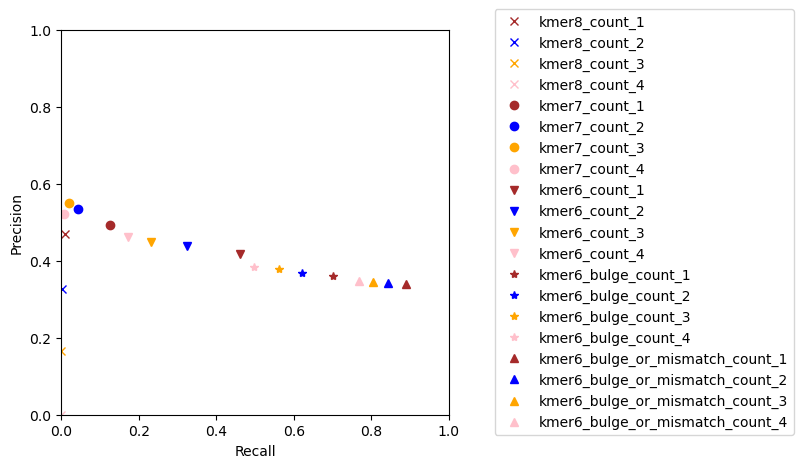

In [47]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(5, 5))
#for index, name in enumerate(data.keys()):

markers = {
    'kmer8': 'x',
    'kmer7': 'o',
    'kmer6': 'v',
    'kmer6_bulge': '*',
    'kmer6_bulge_or_mismatch': '^'
}

colors = ['brown', 'blue', 'orange', 'pink', 'gray', 'black']

for seed_name in seed_types.keys():
    marker = markers[seed_name]
    for threshold in [1,2,3,4]:

        prec, rec, _, _ = precision_recall_fscore_support(data['label'].values, data[seed_name + "_count_" + str(threshold)].values, average='binary')

        ax.plot(rec, prec, marker, color=colors[threshold - 1],  label=seed_name + "_count_" + str(threshold))

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
    
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [48]:
from pathlib import Path

out_path = Path(path)
out_path = out_path.with_name(out_path.stem + '.seed_cls' + out_path.suffix)

with open(out_path, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)